In [2]:
#掛載 GoogleDrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


x (<240) = ? 111
y (<320) = ? 111
tolerance = ? 70
Input/FloodFill


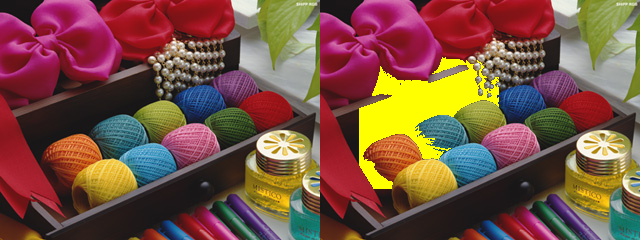

mask


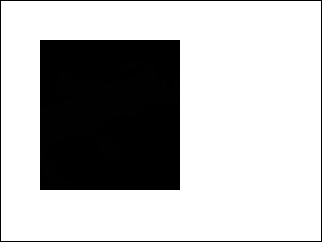

In [19]:
'''影像區域分割：注水填充法（區域成長法/仙女棒）'''
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
pathname = '/content/gdrive/My Drive/Colab Notebooks/'

#注水填充法(Flood Fill)
def fill_image(image, x, y, t):
    copyImage = image.copy()#複製影像
    h, w = image.shape[:2] #讀取影像高寬
    mask = np.zeros([h+2, w+2], np.uint8)#新建影像  +2是函數要求
    mask[40:190, 40:180]=255
    mask = 255 - mask
    cv2.floodFill(copyImage, mask, (y,x), (0,255,255), (t,t,t), (t,t,t), cv2.FLOODFILL_FIXED_RANGE)
    #1.彩色影像, 2.注水填充僅在遮罩的黑色區域執行，3.種子點座標, 4.注水區BGR色彩, 
    #5.種子點BGR值與低門檻的BGR差異, 6.種子點BGR值與低門檻的BGR差異, 7.使用固定門檻
    return copyImage, mask
src = cv2.imread(pathname + 'data/s.jpg')
h, w = src.shape[:2] 
x= int(input('x (<' + str(h) +') = ? '))
y= int(input('y (<' + str(w) +') = ? '))  
t= int(input('tolerance = ? '))
dst, mask = fill_image(src, x, y, t)
dst = np.hstack((src, dst))
print('Input/FloodFill')
cv2_imshow(dst)
print('mask')
cv2_imshow(mask)